# <center>「YOLOv8」Road Mark Detection</center>
### <center>If you feel my notebook helpful, support with one upvote, thank you👍</center>

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Import Libraries</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install ultralytics --quiet

^C
ERROR: Operation cancelled by user


In [2]:
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

/home/licheng.zheng/.conda/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Modeling</div>

In [4]:
# model = YOLO("./yolov8l.pt")
model = YOLO("./yolov8x.pt")

In [5]:
!wandb disabled

W&B disabled.


In [11]:
results = model.train(data="./datasets/data.yaml", epochs=100, save_period=10, seed=seed)

Ultralytics YOLOv8.0.231 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=./yolov8x.pt, data=./datasets/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

100%|██████████| 755k/755k [00:45<00:00, 16.8kB/s] 

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 


  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640,

  9%|▉         | 560k/6.23M [01:40<17:28, 5.68kB/s] 


KeyboardInterrupt: 

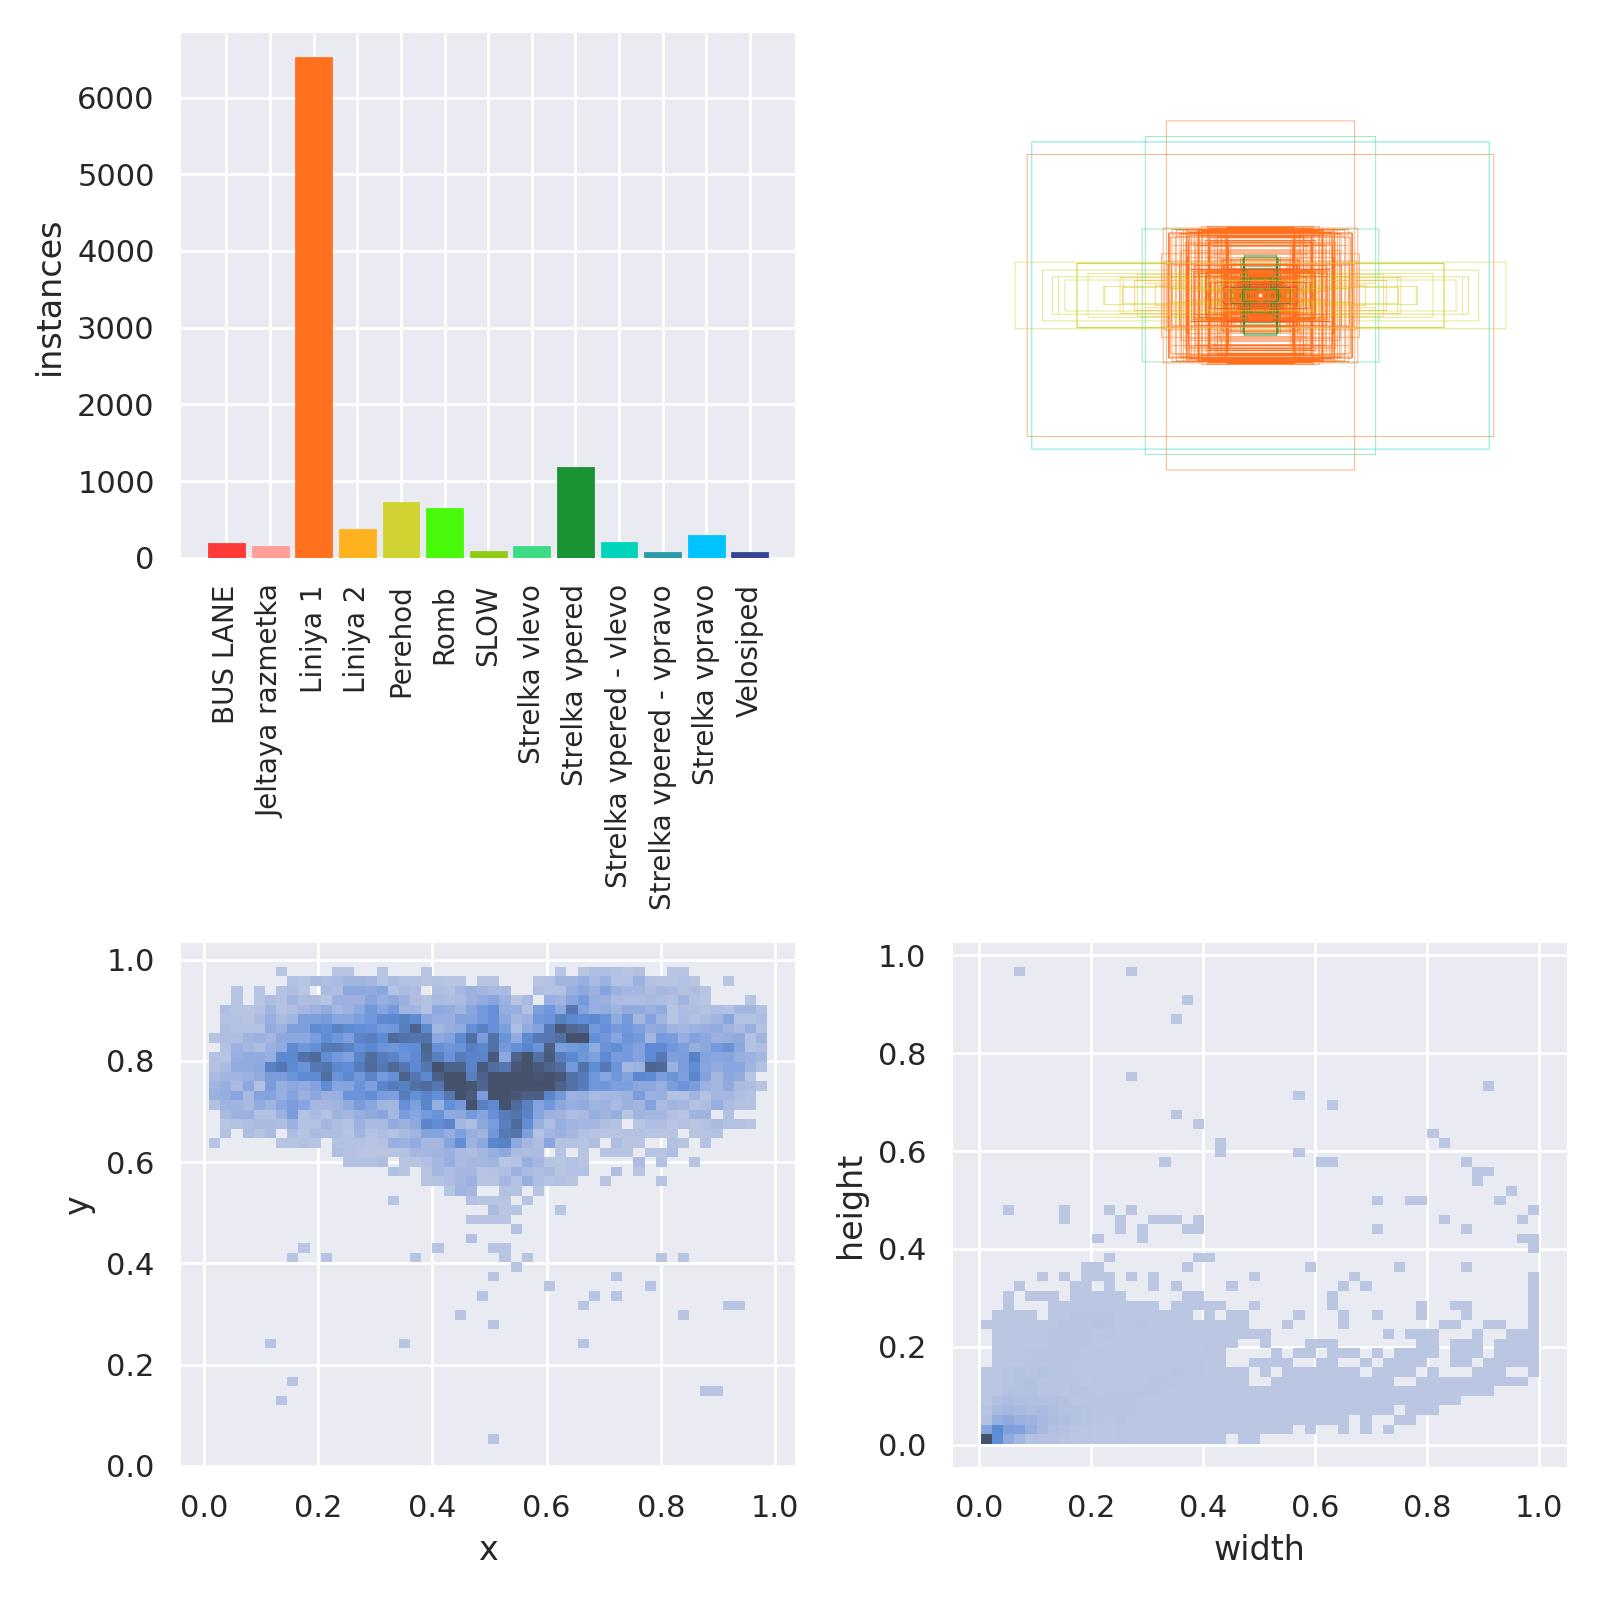

In [7]:
Image.open("/kaggle/working/runs/detect/train/labels.jpg")

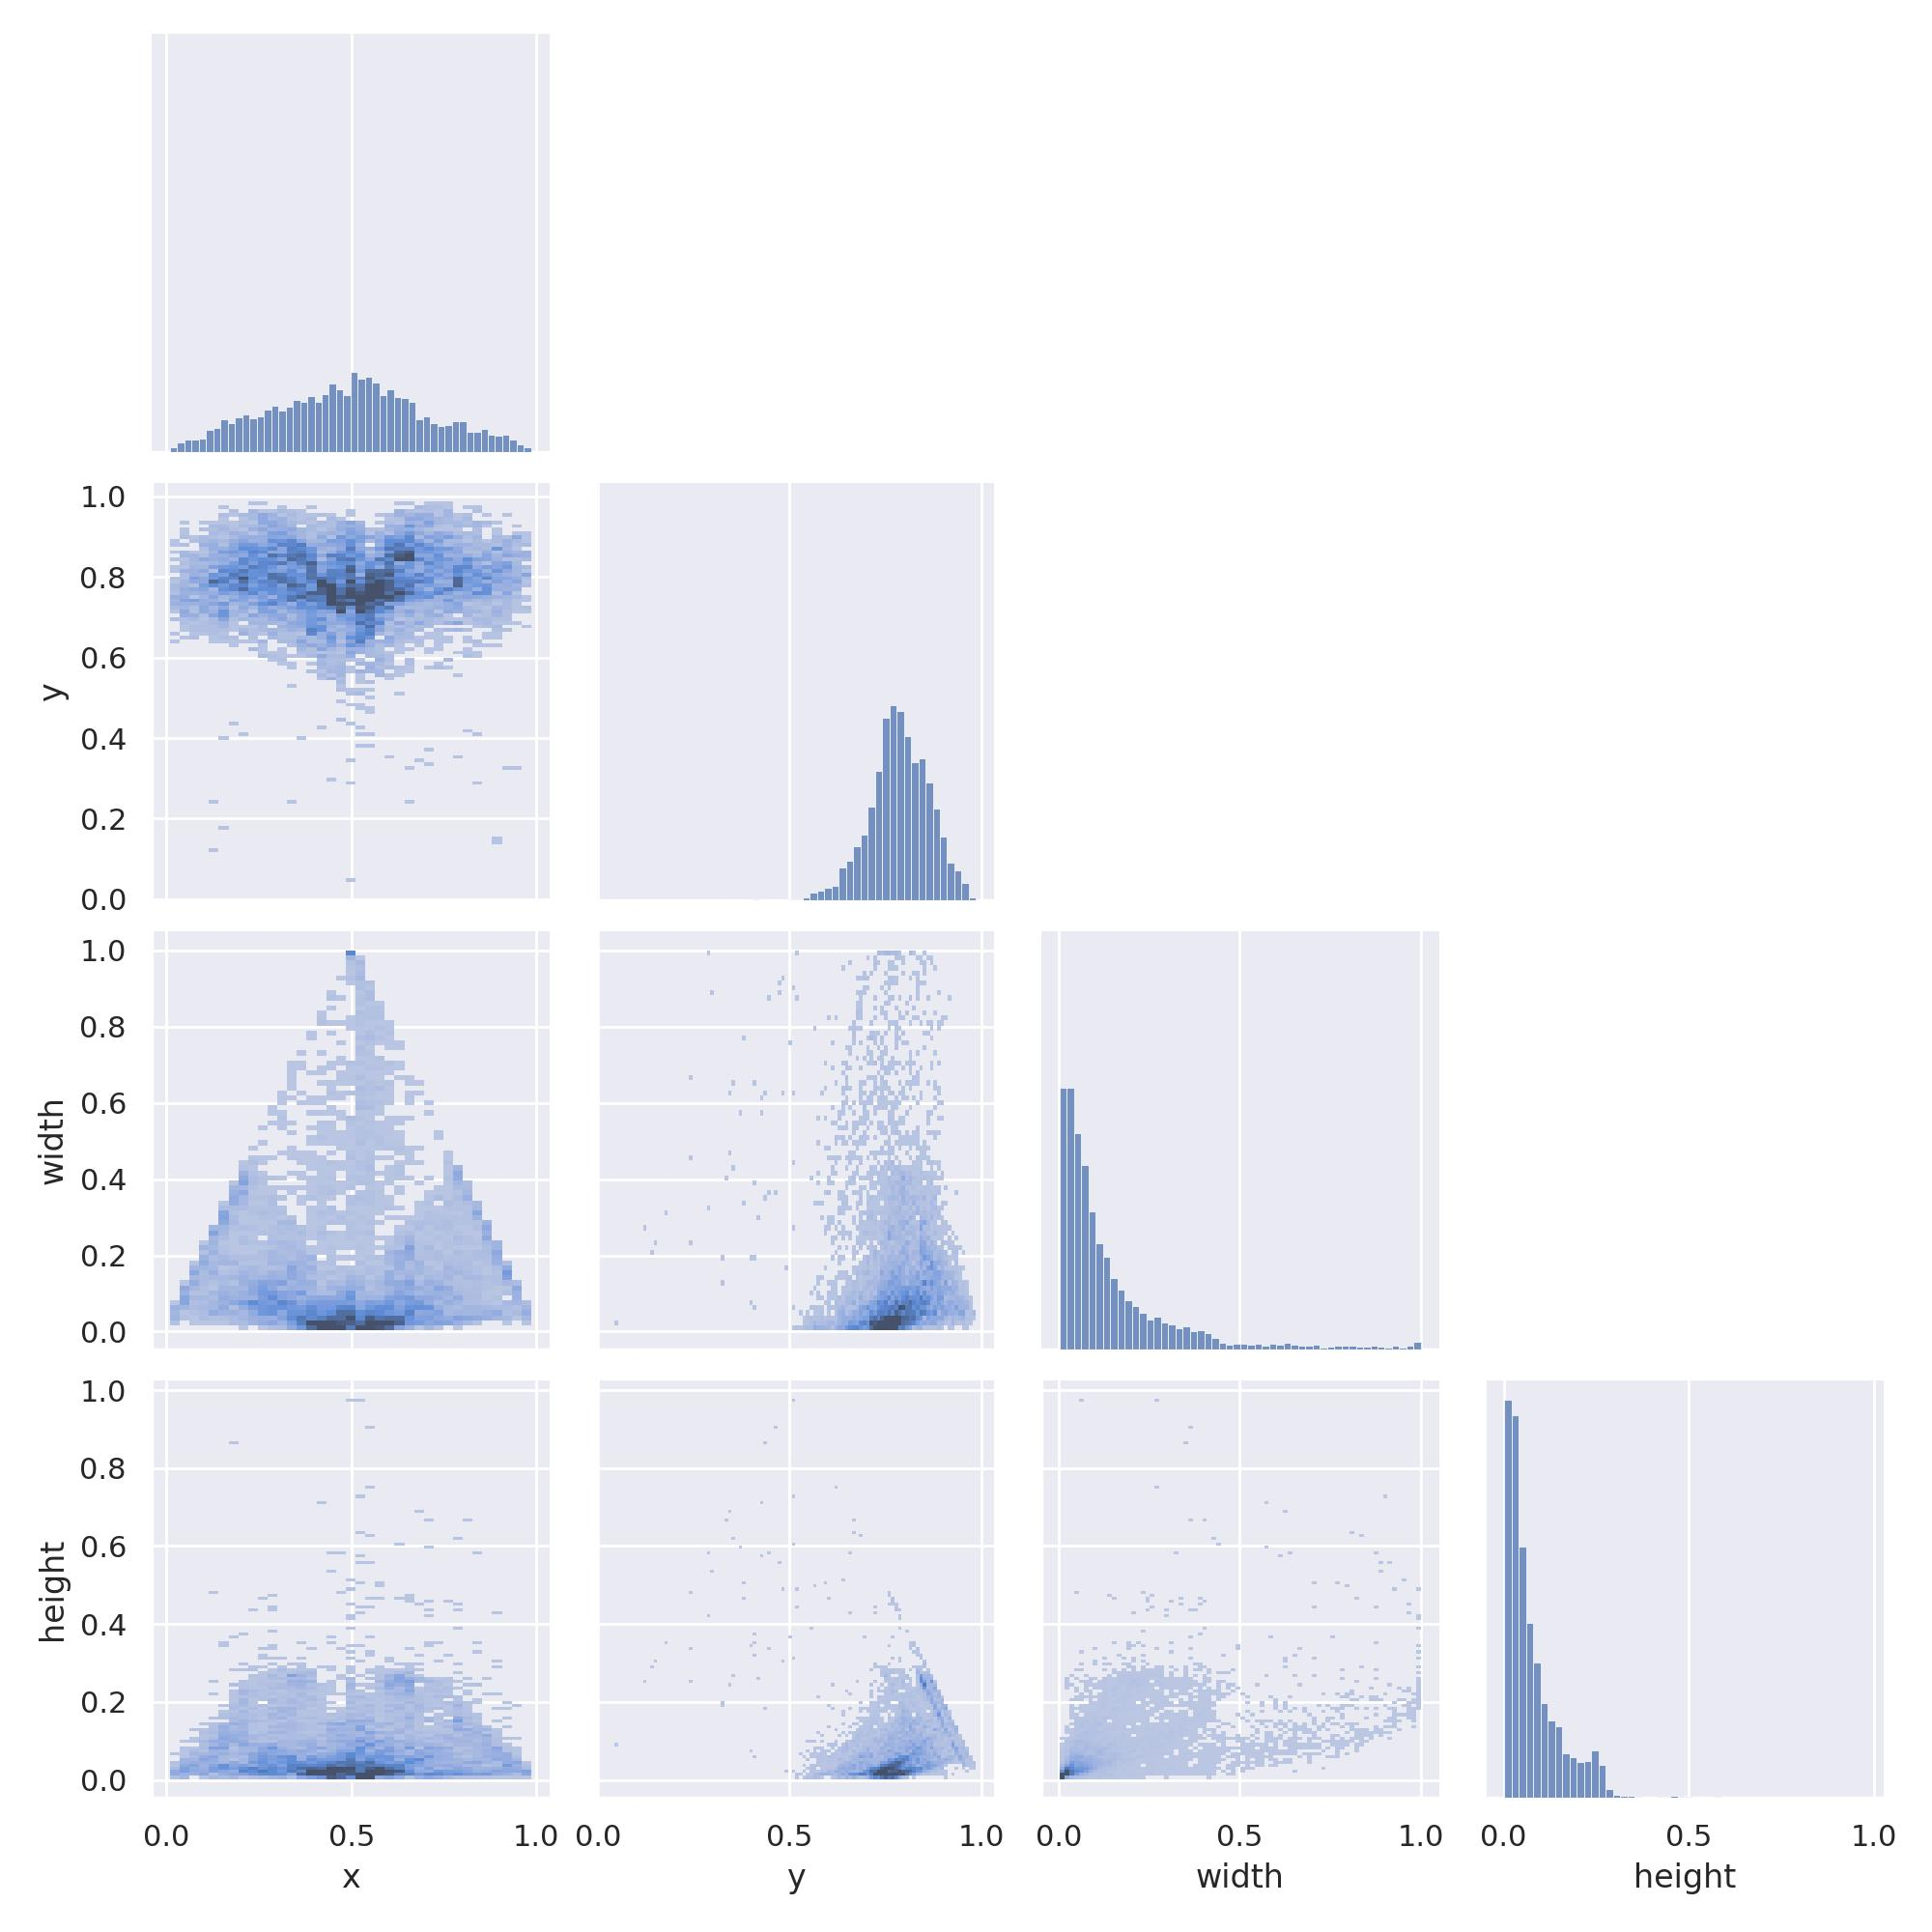

In [8]:
Image.open("/kaggle/working/runs/detect/train/labels_correlogram.jpg")

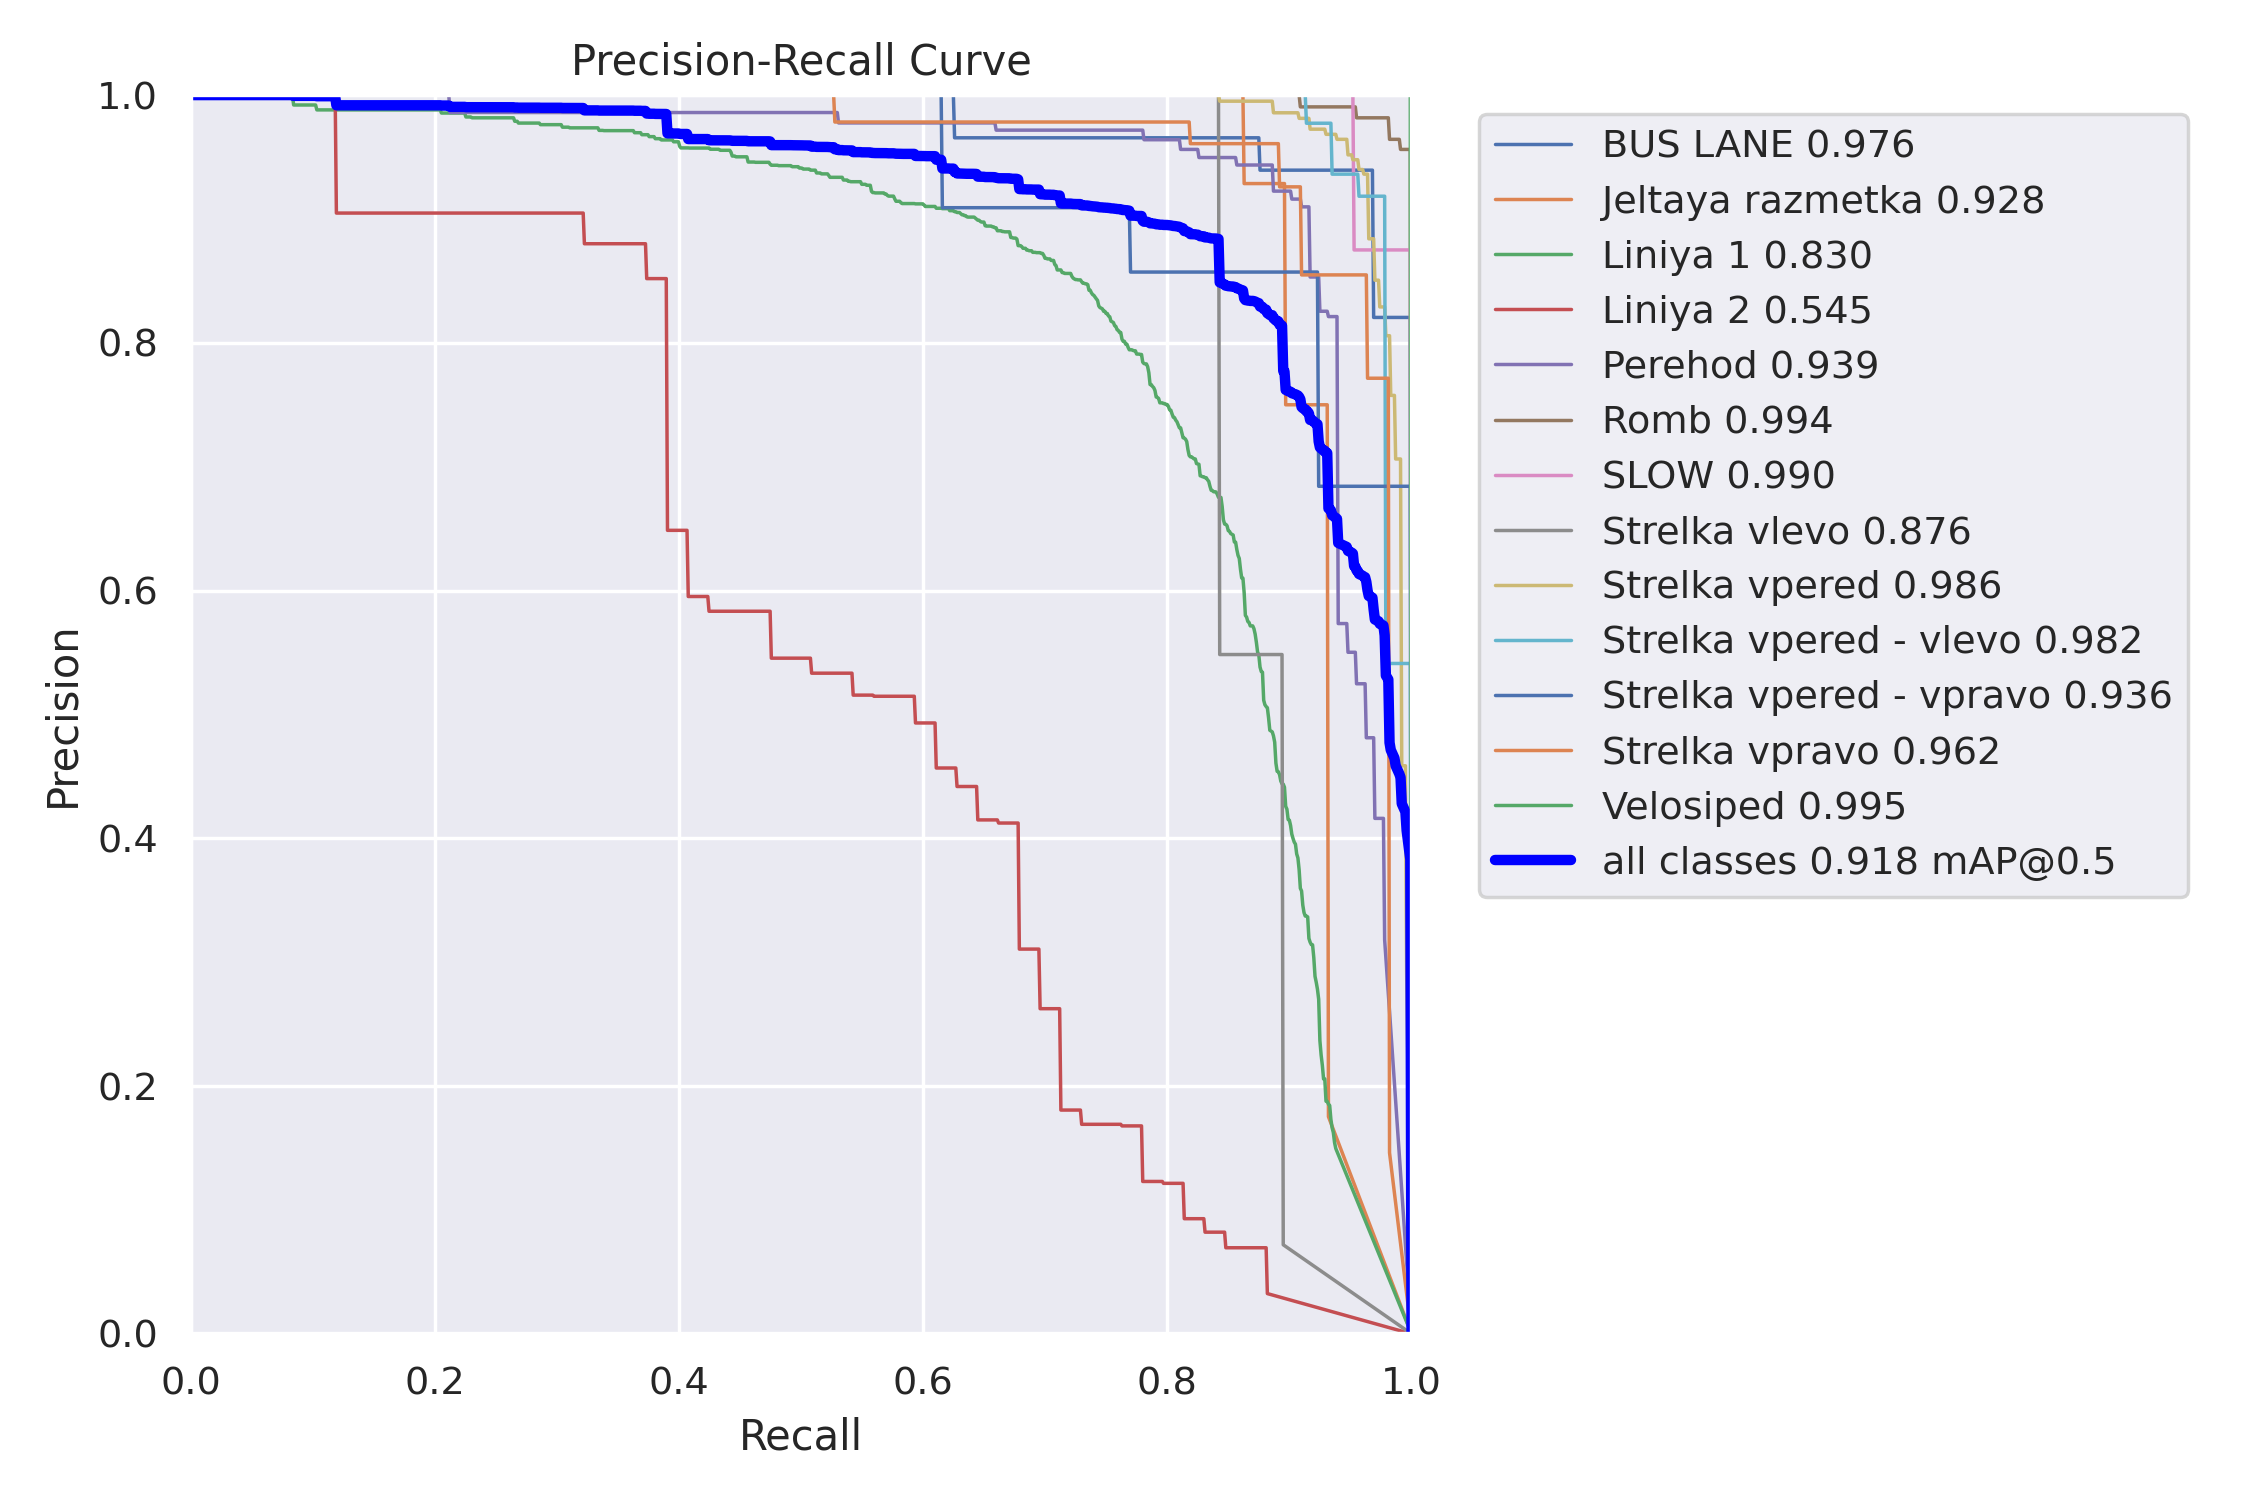

In [9]:
Image.open("/kaggle/working/runs/detect/train/PR_curve.png")

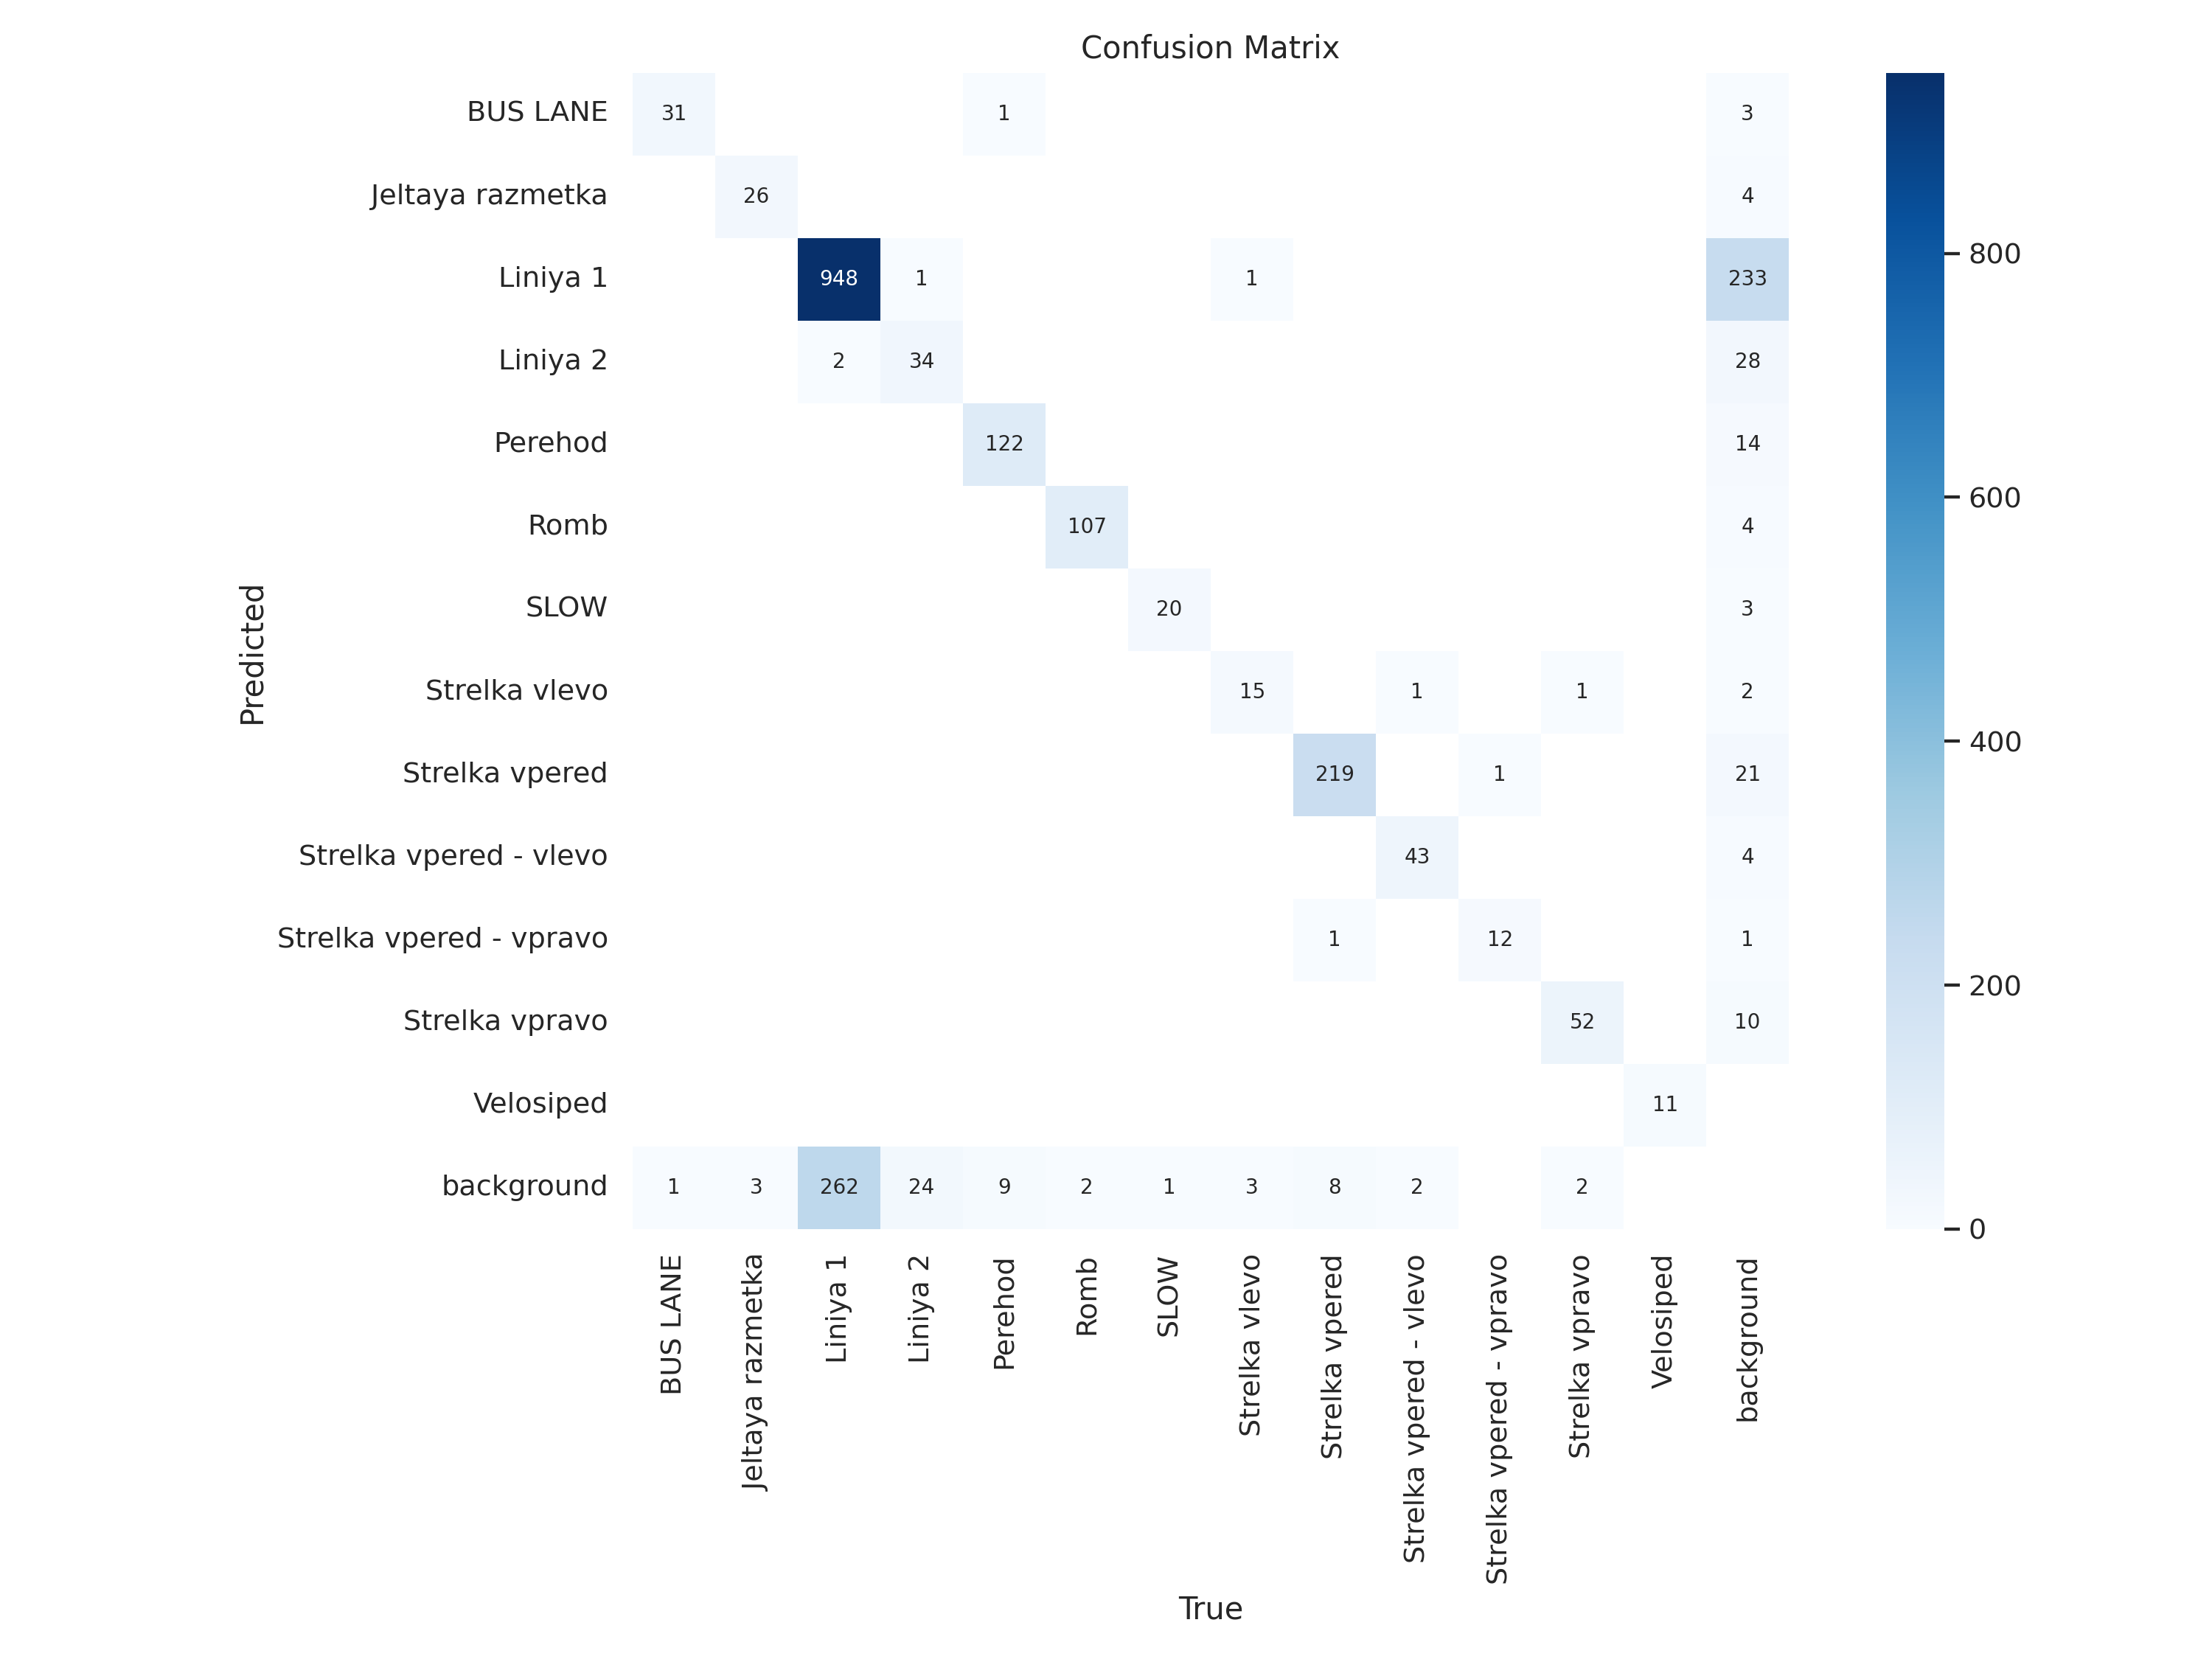

In [10]:
Image.open("/kaggle/working/runs/detect/train/confusion_matrix.png")

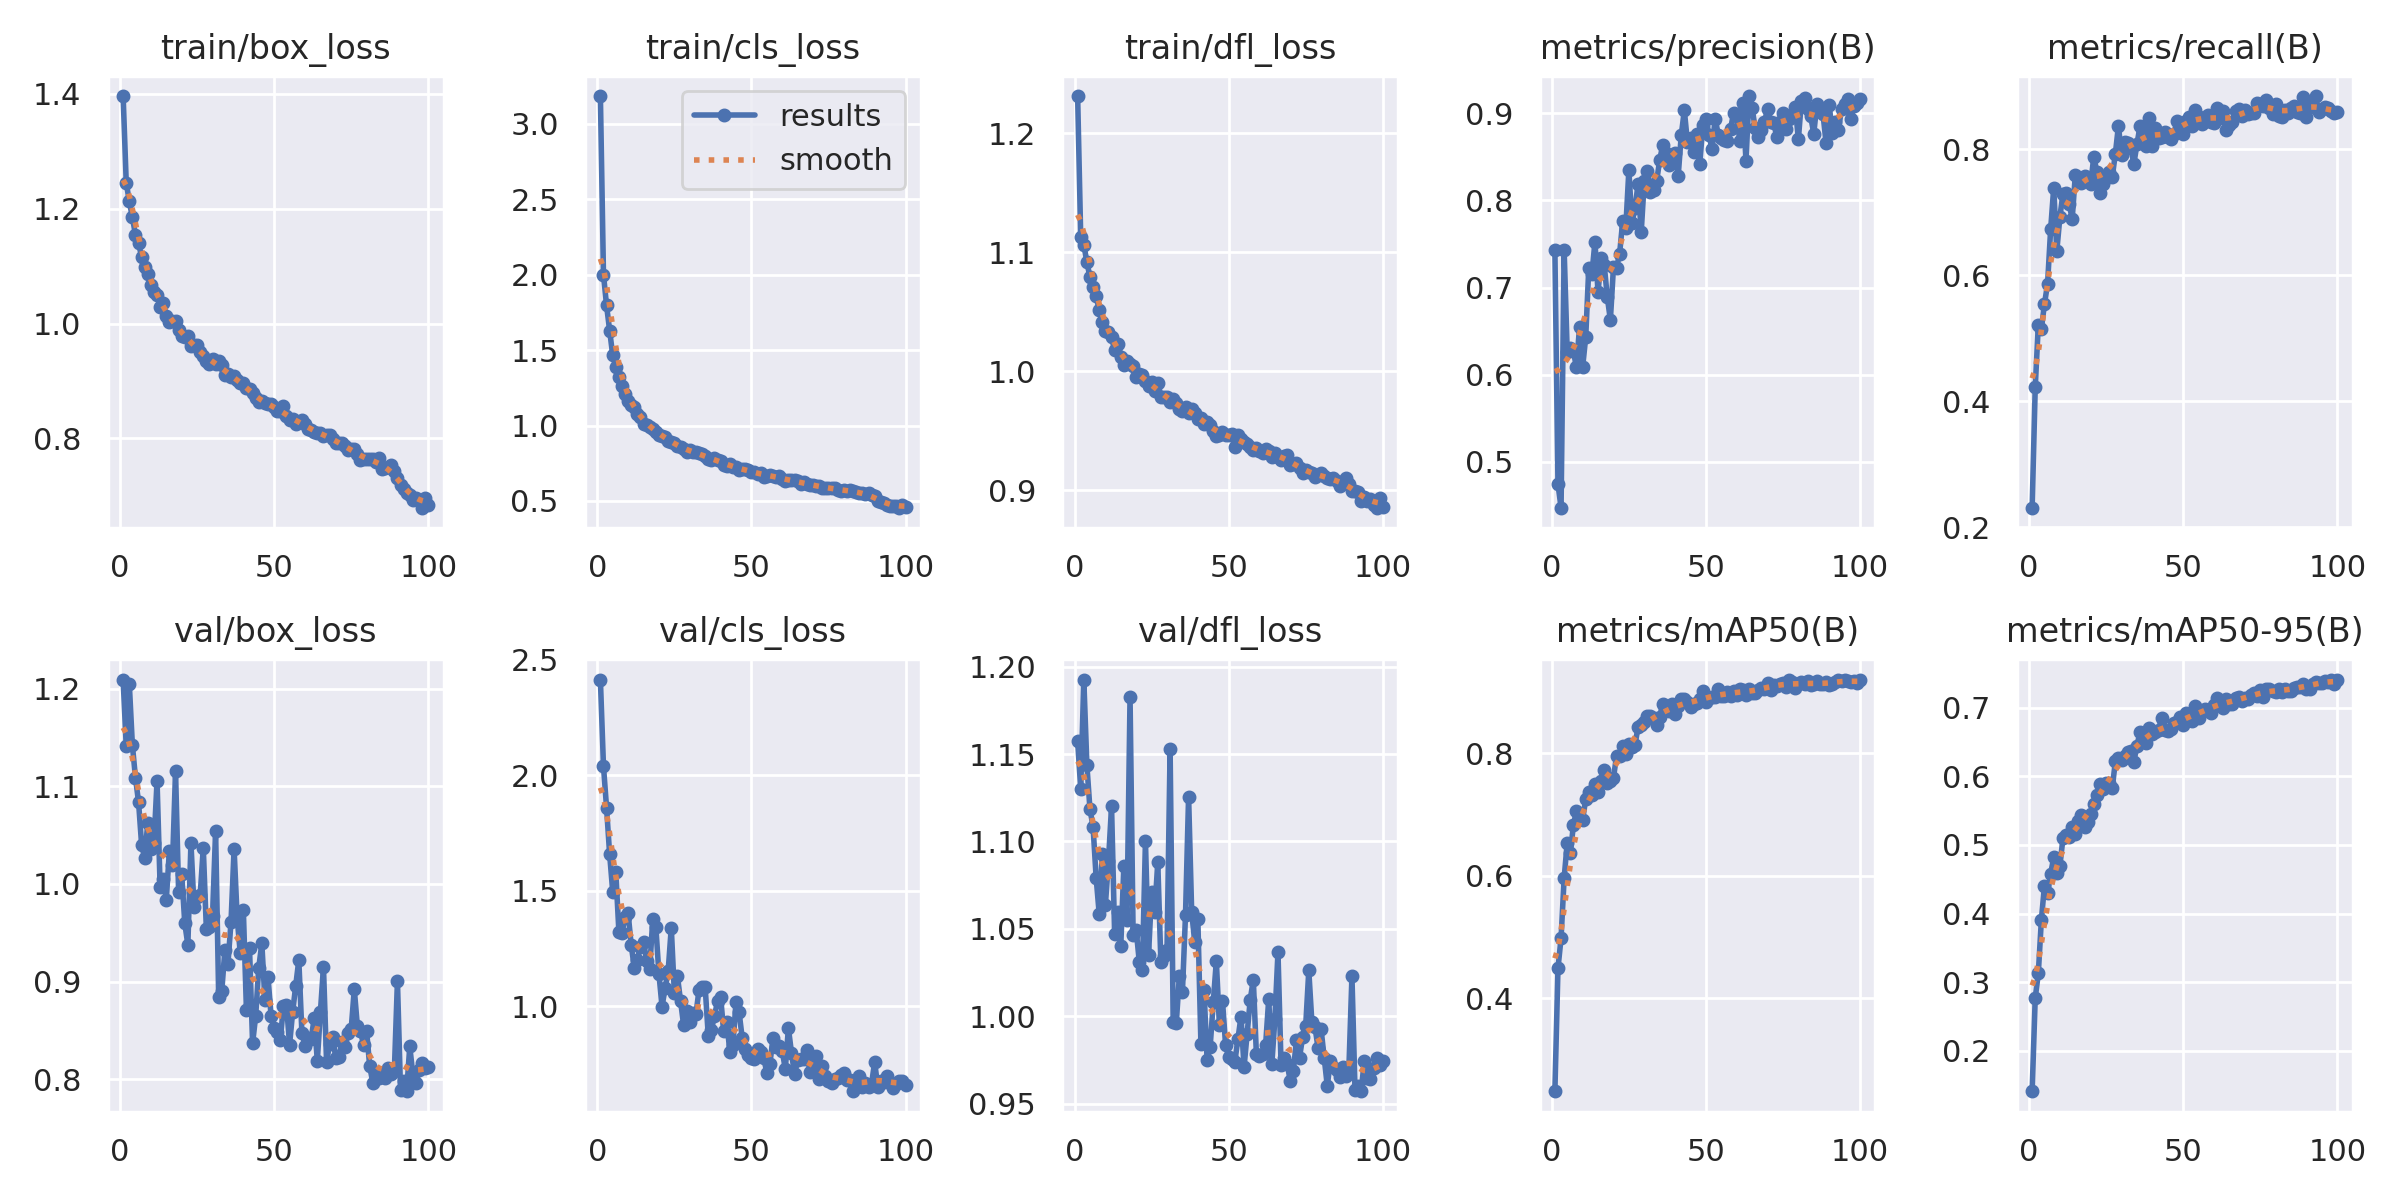

In [11]:
Image.open("/kaggle/working/runs/detect/train/results.png")

In [12]:
model_best = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
metrics = model_best.val()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/road-mark-detection/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<00:00, 682.50it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/road-mark-detection/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.33it/s]


                   all        417       1966      0.915       0.86      0.918      0.741
              BUS LANE        417         32      0.908      0.969      0.975      0.782
      Jeltaya razmetka        417         29      0.923      0.897      0.928      0.748
              Liniya 1        417       1212      0.893      0.669      0.832      0.615
              Liniya 2        417         59      0.825       0.39      0.545      0.324
               Perehod        417        132      0.931      0.886      0.936      0.724
                  Romb        417        109      0.981      0.973      0.994      0.746
                  SLOW        417         21      0.954      0.952       0.99      0.768
         Strelka vlevo        417         19      0.882      0.842      0.876      0.769
        Strelka vpered        417        228      0.965      0.939      0.986      0.839
Strelka vpered - vlevo        417         46      0.935      0.935      0.982      0.856
Strelka vpered - vpra

In [13]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9145317841111802
metrics/recall(B):  0.8596348371408605
metrics/mAP50(B):  0.9182436157465528
metrics/mAP50-95(B):  0.7412164544960127


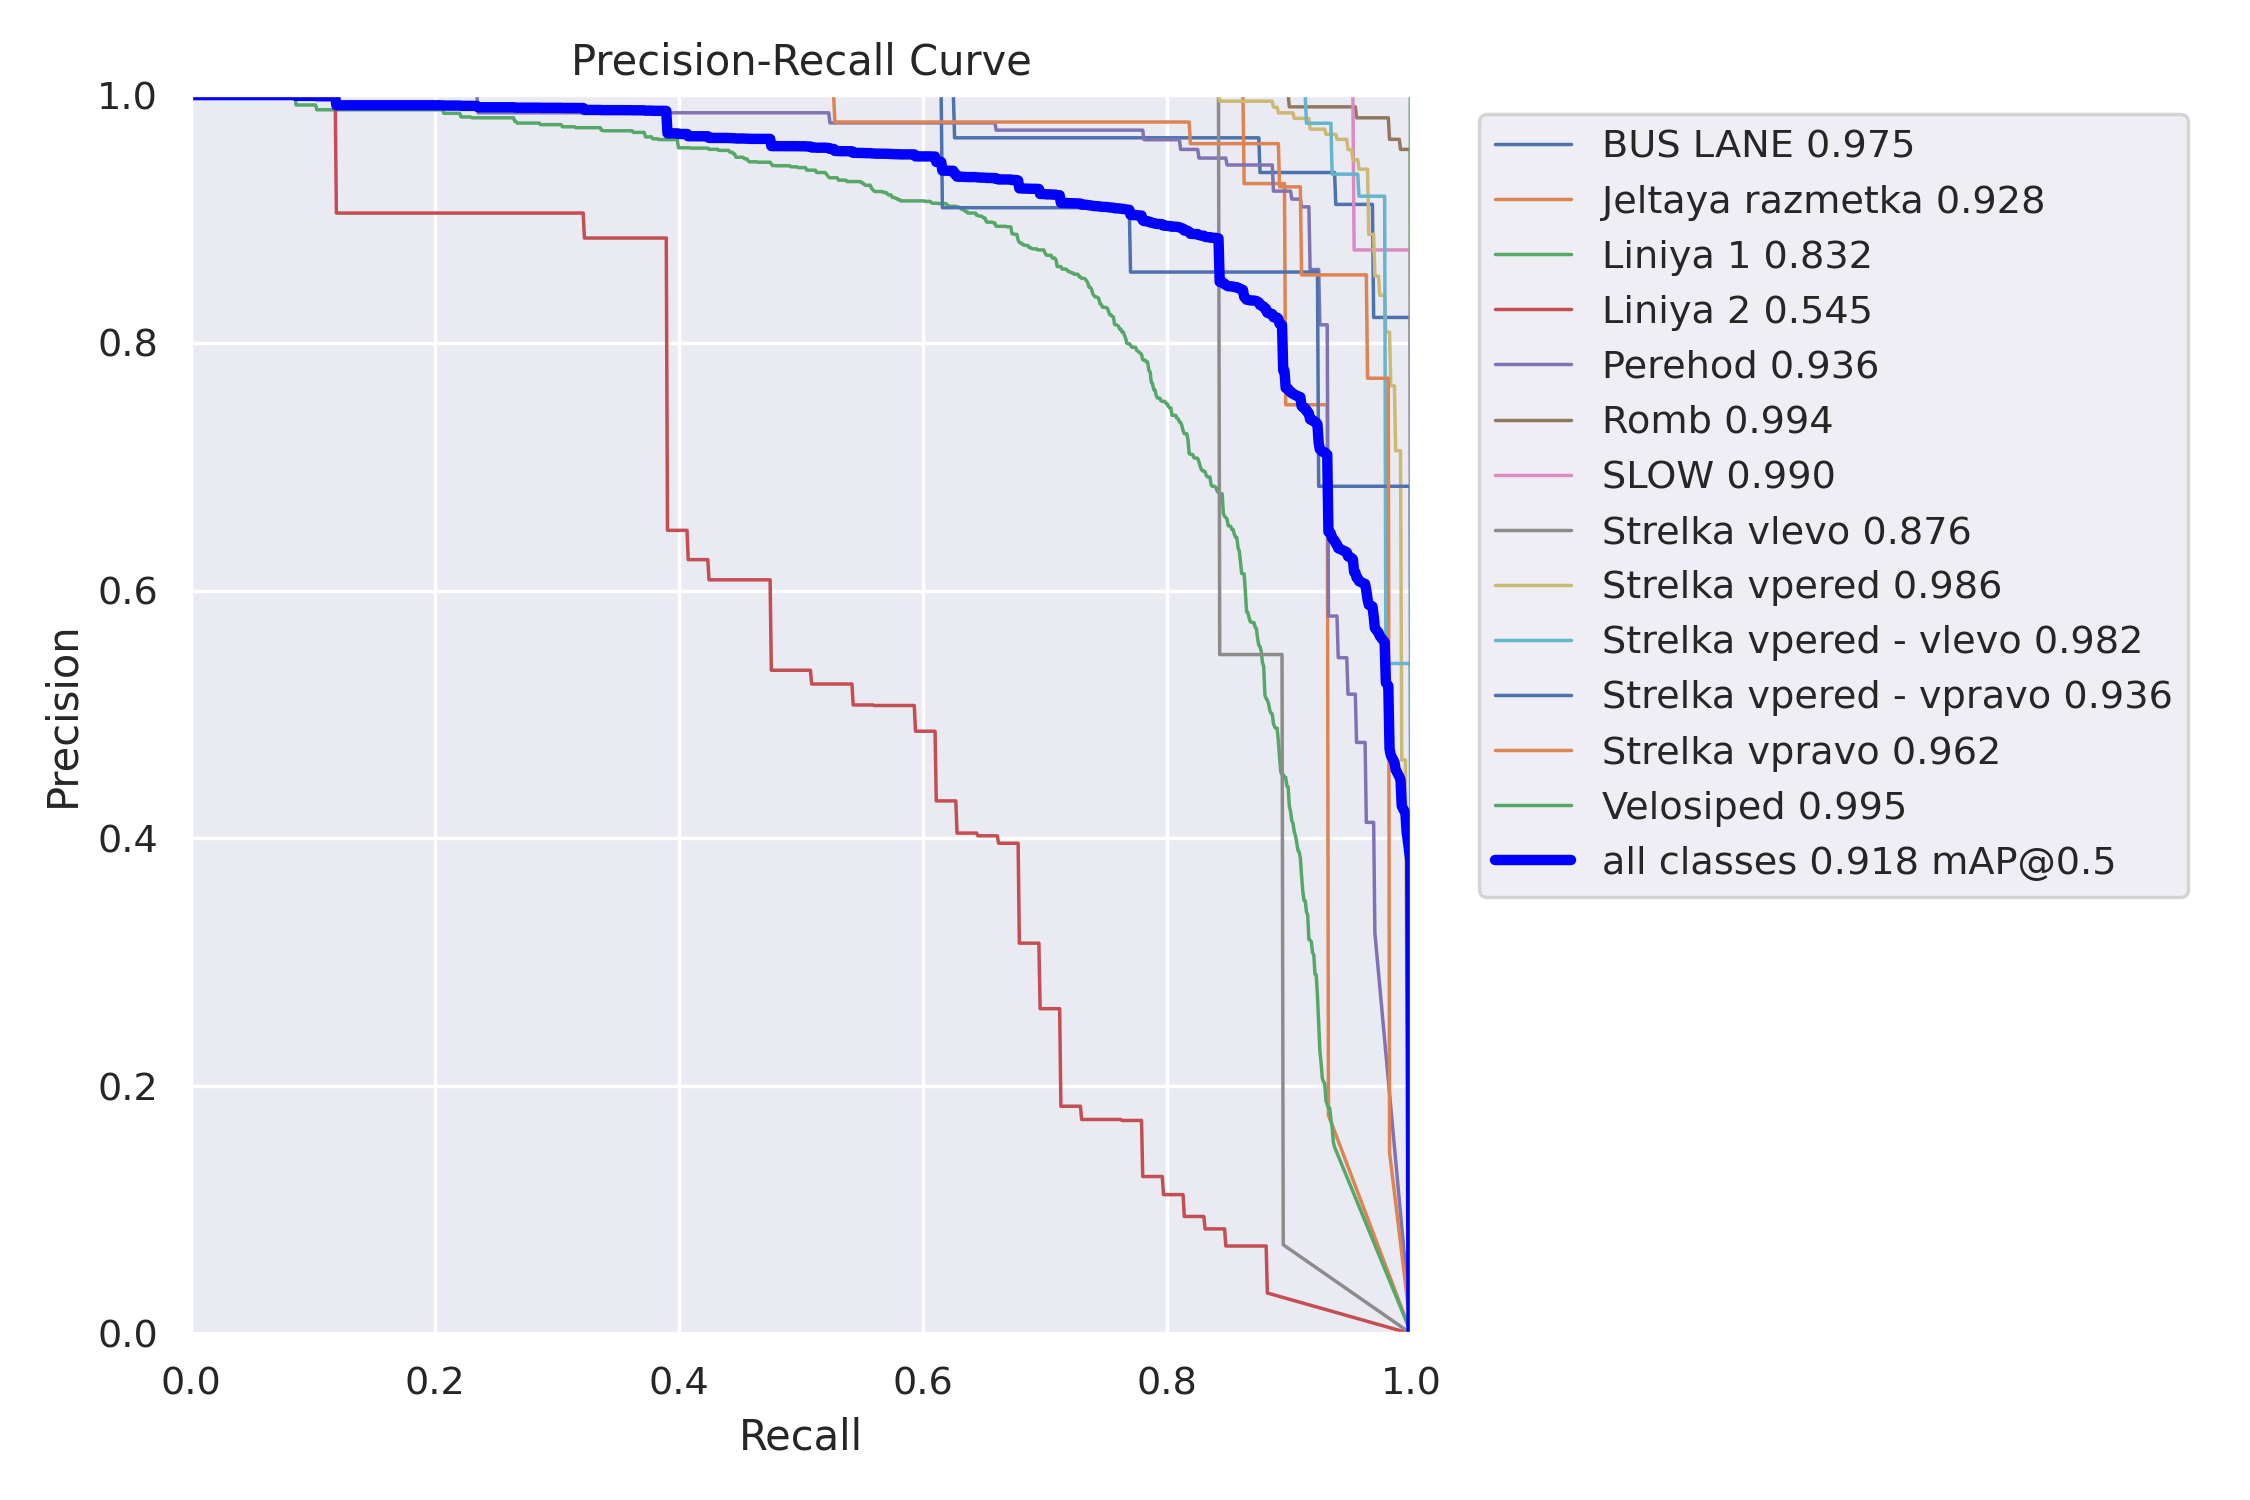

In [14]:
Image.open("/kaggle/working/runs/detect/val/PR_curve.png")

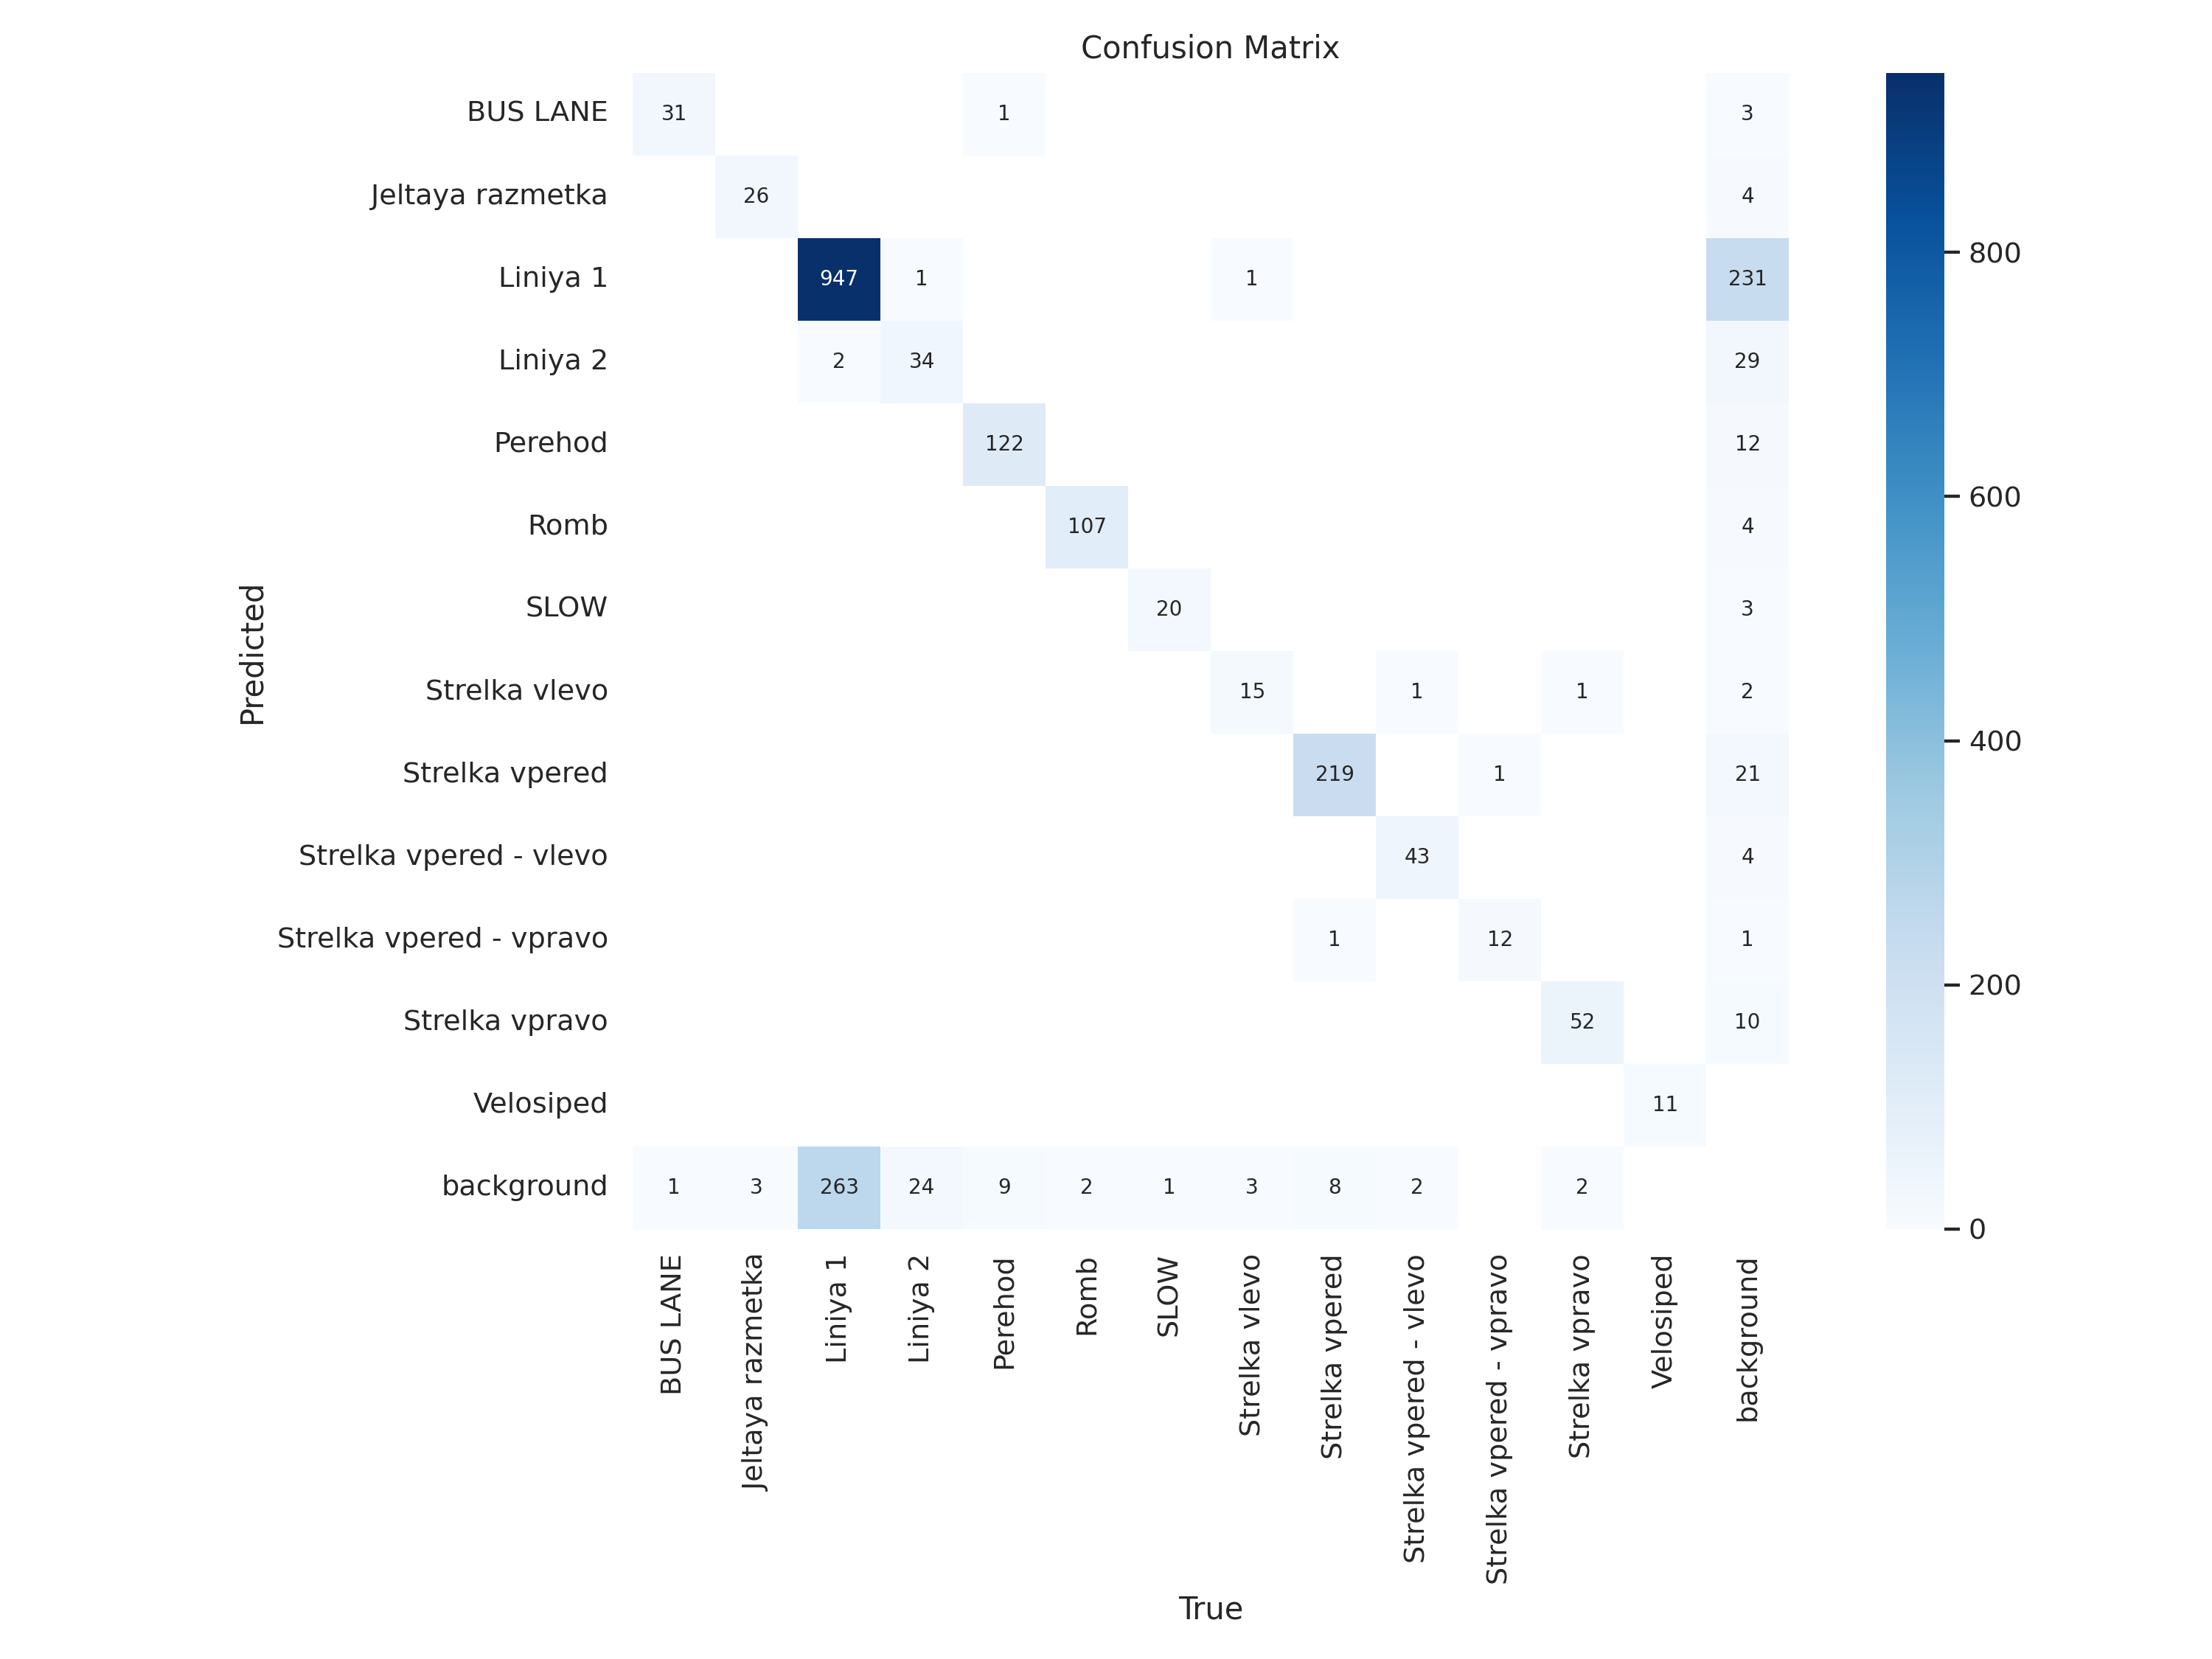

In [15]:
Image.open("/kaggle/working/runs/detect/val/confusion_matrix.png")

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Predict Test Data</div>

In [16]:
paths = glob.glob("/kaggle/input/road-mark-detection/test/images/*")


0: 640x640 1 Perehod, 1: 640x640 3 Liniya 1s, 2 Strelka vpereds, 2: 640x640 5 Liniya 1s, 3 Rombs, 3: 640x640 1 Jeltaya razmetka, 1 Strelka vpered, 4: 640x640 2 Liniya 1s, 1 Strelka vpered, 1 Strelka vpravo, 5: 640x640 1 Liniya 1, 2 Strelka vpereds, 1 Strelka vpered - vlevo, 6: 640x640 5 Liniya 1s, 2 Rombs, 7: 640x640 2 Strelka vpereds, 8: 640x640 1 Jeltaya razmetka, 9: 640x640 1 Liniya 1, 1 Perehod, 68.0ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


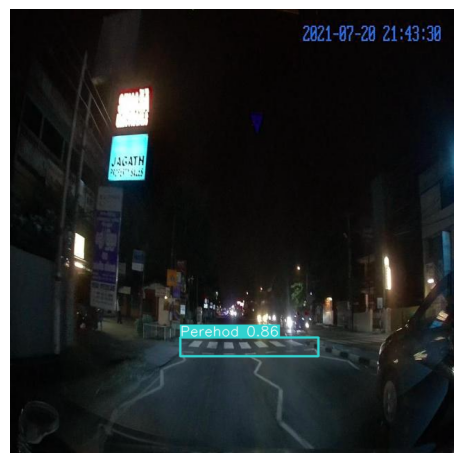

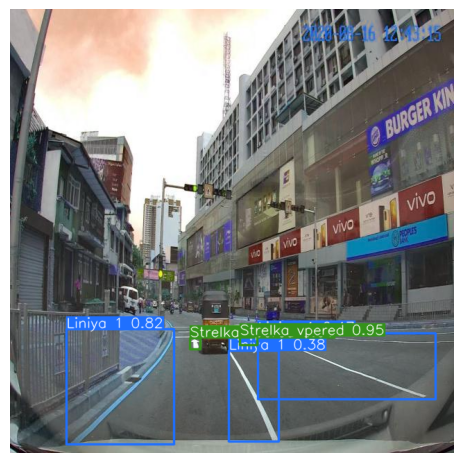

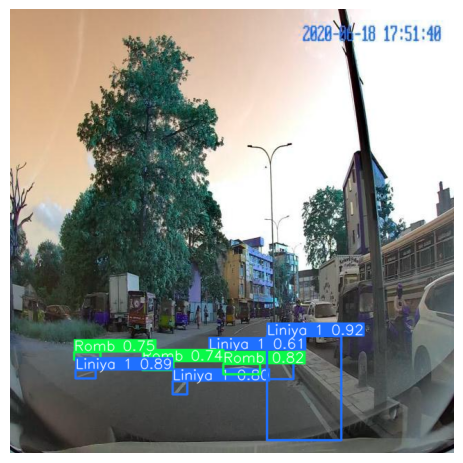

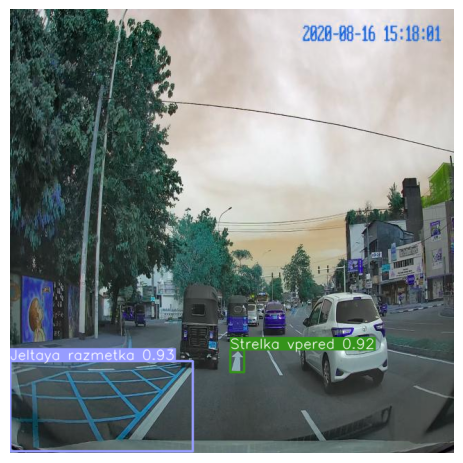

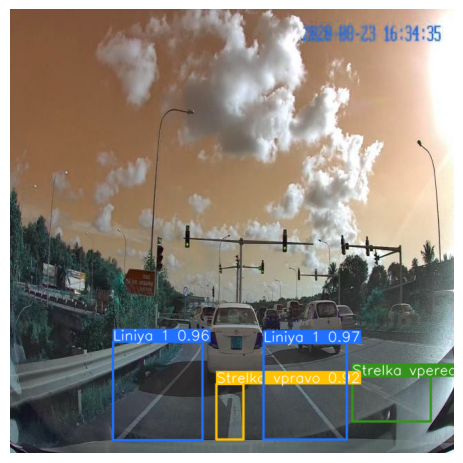

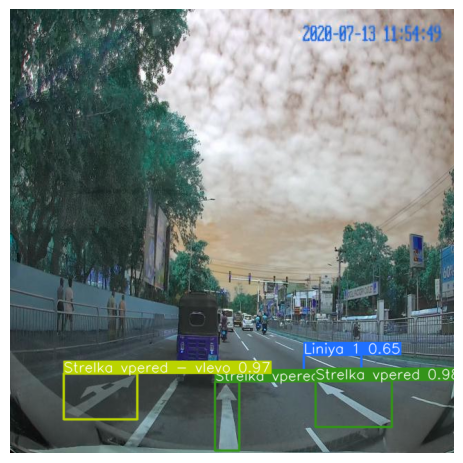

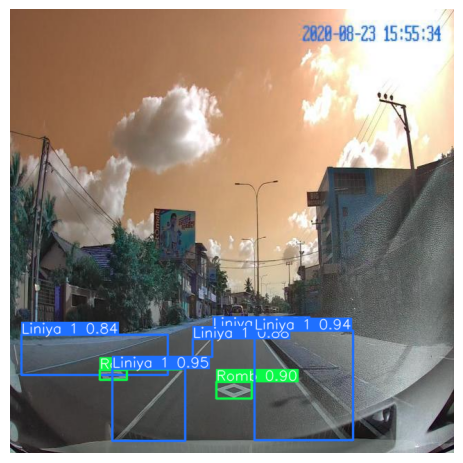

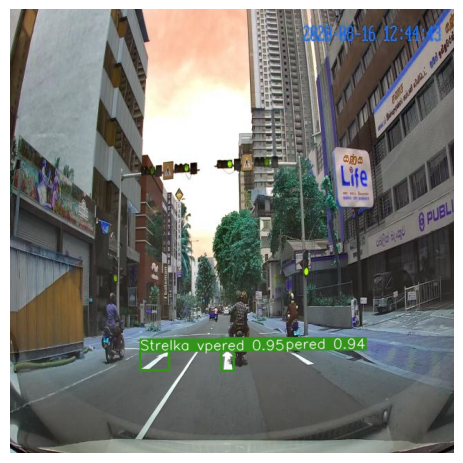

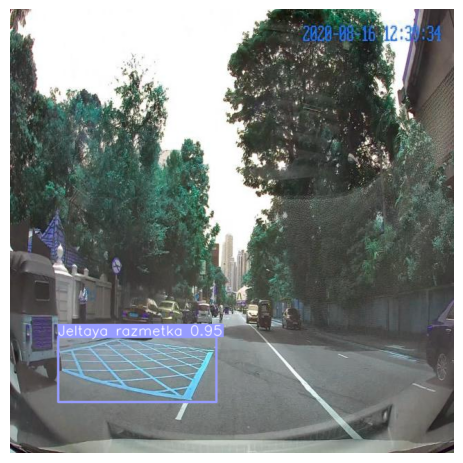

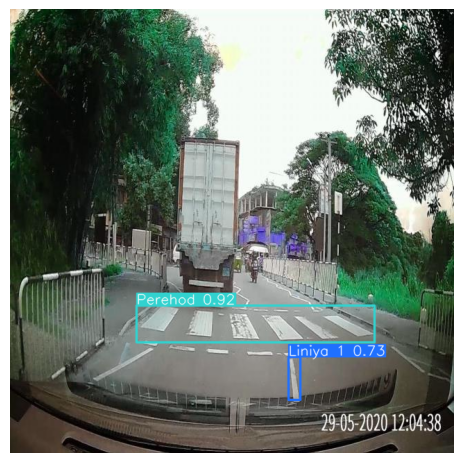

In [17]:
n = 10
results = model_best.predict(paths[:n])
for i in range(n):
    r = results[i]
    img = Image.fromarray(r.plot())
    plt.figure(dpi=100)
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    plt.show()